### < 관광, 유학/연수>

#### 1. 데이터 읽어오기

In [1]:
import pandas as pd

In [2]:
import os

In [3]:
import glob

In [4]:
def kto_data(yy, mm):
    # 1. 불러올 엑셀 파일 경로 지정
    file_path = '1005/kto_{}{}.xlsx'.format(yy, mm)
    
    # 2. 엑셀 파일 불러오기
    # 1번 컬럼을 header로 보냄
    # 가장 아래쪽 4개의 통계를 skip함
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = 'A:G')
    
    # 3. '기준년' 컬럼 추가
    df['년'] = '{}'.format(yy)
    
    # 4. '국적' 컬럼에서 대륙 데이터 제거
    ignore_list = ['아시아주', '아시아 기타', '구주', '구주 기타', '대양주 기타', '아프리카 기타', '아프리카주', '미주', '미주 기타', '대양주', '교포', '교포소계', 'GCC', '기타대륙', '국적미상']
    condition = (df['국적'].isin(ignore_list) == False) #대륙정보 미포함 조건
    df_country = df[condition].reset_index(drop = True) #대륙정보 제거
    
    # 5. '대통령' 칼럼 추가 (2010 ~ 2012 // 2013 ~ 2016 // 2017 ~ 2020)
    if yy in [2010, 2011, 2012]:
        df_country['대통령'] = '이명박'
    elif yy in [2013, 2014, 2015, 2016]:
        df_country['대통령'] = '박근혜'
    else:
        df_country['대통령'] = '문재인'
        
    # 6. 결과 출력
    return(df_country.iloc[:, [0,1,4,7,8]])

In [ ]:
kto_data(2010,'01')

In [5]:
kto_data_df = pd.DataFrame()

for yy in range(2010, 2021):
    for mm in range(1, 13):
        try:
            # zfill : 2자리 수로 맞추기
            # 1의 경우 01로 맞춰주는 것
            temp = kto_data(yy, str(mm).zfill(2))
            
            kto_data_df = kto_data_df.append(temp, ignore_index = True)
        except:
            # 2020년은 5월까지만 있으니까 아마도 여기서 Pass
            pass

C:\Users\admin\AppData\Local\Temp\ipykernel_6312\21708525.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kto_data_df = kto_data_df.append(temp, ignore_index = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_6312\21708525.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kto_data_df = kto_data_df.append(temp, ignore_index = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_6312\21708525.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kto_data_df = kto_data_df.append(temp, ignore_index = True)
C:\Users\admin\AppData\Local\Temp\ipykernel_6312\21708525.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  kto_data_df = kto_da

In [6]:
kto_data_df

,국적,관광,유학/연수,년,대통령
0,일본,202825,549,2010,이명박
1,대만,35788,37,2010,이명박
2,홍콩,13874,21,2010,이명박
3,마카오,554,0,2010,이명박
4,태국,13374,53,2010,이명박
...,...,...,...,...,...
6495,불가리아,13,0,2020,문재인
6496,폴란드,40,0,2020,문재인
6497,오스트레일리아,30,0,2020,문재인
6498,뉴질랜드,4,1,2020,문재인


#### 2. 데이터 나누기

In [7]:
kto_data_df

,국적,관광,유학/연수,년,대통령
0,일본,202825,549,2010,이명박
1,대만,35788,37,2010,이명박
2,홍콩,13874,21,2010,이명박
3,마카오,554,0,2010,이명박
4,태국,13374,53,2010,이명박
...,...,...,...,...,...
6495,불가리아,13,0,2020,문재인
6496,폴란드,40,0,2020,문재인
6497,오스트레일리아,30,0,2020,문재인
6498,뉴질랜드,4,1,2020,문재인


In [8]:
kto_data_df.groupby('년')[['관광', '유학/연수']].sum().sort_values(by = '관광', ascending = False)

,관광,유학/연수
년,,
2019,14281365,366146
2016,13820622,242952
2018,12277975,323129
2014,10825921,156285
2017,10294061,294293
2015,10033779,194968
2013,8983586,146376
2012,8574352,141404
2011,7133700,146436


In [17]:
df_travel = kto_data_df.iloc[:, [0,1,3,4]].sort_values(by = '관광', ascending = False, ignore_index = True)
df_study = kto_data_df.iloc[:, [0,2,3,4]].sort_values(by = '유학/연수', ascending = False, ignore_index = True)

#### 관광
2010 ~ 2012 // 2013 ~ 2016 // 2017 ~ 2020

In [24]:
df_travel

,국적,관광,년,대통령
0,중국,823016,2016,박근혜
1,중국,747818,2016,박근혜
2,중국,671493,2016,박근혜
3,중국,614636,2016,박근혜
4,중국,611538,2016,박근혜
...,...,...,...,...
6495,이스라엘,0,2020,문재인
6496,몽골,0,2020,문재인
6497,방글라데시,0,2020,문재인
6498,파키스탄,0,2020,문재인


In [25]:
df_travel_lee = df_travel.query('년 == "2010" | 년 == "2011" | 년 == "2012"')
df_travel_lee.sort_values(by = '관광', ascending = False)

,국적,관광,년,대통령
47,일본,353455,2012,이명박
51,일본,334318,2012,이명박
52,일본,332700,2011,이명박
57,일본,325057,2011,이명박
61,일본,315693,2011,이명박
...,...,...,...,...
6395,방글라데시,60,2011,이명박
6406,이란,50,2011,이명박
6412,이란,44,2010,이명박
6413,이란,42,2011,이명박


In [26]:
df_travel_lee.groupby(['년', '국적']).sum()

관광
년    국적              
2010 그리스         4450
     남아프리카공화국    4456
     네덜란드       16794
     노르웨이        8380
     뉴질랜드       21711
...               ...
2012 폴란드         8095
     프랑스        53779
     핀란드         6639
     필리핀       103584
     홍콩        350030

[156 rows x 1 columns]

In [28]:
df_travel_lee = df_travel_lee.groupby('국적').sum().sort_values(by = '관광', ascending = False).head(15)
df_travel_lee

,관광
국적,
일본,9575524
중국,4357976
미국,1484633
대만,1346519
홍콩,840103
태국,773362
말레이시아,387574
싱가포르,340695
오스트레일리아,298150


In [29]:
df_travel_park = df_travel.query('년 == "2013" | 년 == "2014" | 년 == "2015" | 년 == "2016"')
df_travel_park = df_travel_park.groupby('국적').sum().sort_values(by = '관광', ascending = False).head(15)
df_travel_park

,관광
국적,
중국,19573172
일본,8762755
대만,2474174
미국,2336303
홍콩,2085514
태국,1395350
말레이시아,883851
싱가포르,676340
필리핀,549753


In [30]:
df_travel_moon = df_travel.query('년 == "2017" | 년 == "2018" | 년 == "2019"')
df_travel_moon = df_travel_moon.groupby('국적').sum().sort_values(by = '관광', ascending = False).head(15)
df_travel_moon

,관광
국적,
중국,11711907
일본,8266760
대만,3241236
미국,2212957
홍콩,1993849
태국,1394023
말레이시아,1001330
베트남,935437
필리핀,767572


#### 유학/연수
2010 ~ 2012 // 2013 ~ 2016 // 2017 ~ 2020

In [31]:
df_study

,국적,유학/연수,년,대통령
0,중국,44291,2019,문재인
1,중국,42620,2017,문재인
2,중국,40388,2017,문재인
3,중국,39061,2018,문재인
4,중국,38731,2019,문재인
...,...,...,...,...
6495,아일랜드,0,2014,박근혜
6496,포르투갈,0,2010,이명박
6497,그리스,0,2010,이명박
6498,불가리아,0,2015,박근혜


In [32]:
df_study_lee = df_study.query('년 == "2010" | 년 == "2011" | 년 == "2012"')
df_study_lee = df_study_lee.groupby('국적').sum().sort_values(by = '유학/연수', ascending = False).head(15)
df_study_lee

,유학/연수
국적,
중국,324306
일본,20544
몽골,12054
베트남,9556
미국,5827
프랑스,4855
대만,3846
말레이시아,3416
독일,3288


In [33]:
df_study_park = df_study.query('년 == "2013" | 년 == "2014" | 년 == "2015" | 년 == "2016"')
df_study_park = df_study_park.groupby('국적').sum().sort_values(by = '유학/연수', ascending = False).head(15)
df_study_park

,유학/연수
국적,
중국,519476
일본,34235
베트남,31815
몽골,17478
프랑스,12714
미국,11695
대만,9635
독일,8565
인도네시아,7819


In [34]:
df_study_moon = df_study.query('년 == "2017" | 년 == "2018" | 년 == "2019"')
df_study_moon = df_study_moon.groupby('국적').sum().sort_values(by = '유학/연수', ascending = False).head(15)
df_study_moon

,유학/연수
국적,
중국,654797
베트남,107326
일본,33536
몽골,23903
우즈베키스탄,16896
프랑스,14025
미국,13267
대만,12778
독일,8964


#### 관광 + 유학/연수

In [ ]:
df_travel_lee
df_travel_park
df_travel_moon

In [ ]:
df_study_lee
df_study_park
df_study_moon

In [35]:
df_lee = pd.merge(df_travel_lee, df_study_lee, on = '국적')
df_lee

,관광,유학/연수
국적,,
일본,9575524,20544
중국,4357976,324306
미국,1484633,5827
대만,1346519,3846
태국,773362,2113
말레이시아,387574,3416
싱가포르,340695,1596
필리핀,259697,2230
독일,222273,3288


In [36]:
df_park = pd.merge(df_travel_park, df_study_park, on = '국적')
df_park

,관광,유학/연수
국적,,
중국,19573172,519476
일본,8762755,34235
대만,2474174,9635
미국,2336303,11695
홍콩,2085514,5648
말레이시아,883851,7171
러시아,514024,5297
인도네시아,442691,7819
베트남,391029,31815


In [37]:
df_moon = pd.merge(df_travel_moon, df_study_park, on = '국적')
df_moon

,관광,유학/연수
국적,,
중국,11711907,519476
일본,8266760,34235
대만,3241236,9635
미국,2212957,11695
홍콩,1993849,5648
말레이시아,1001330,7171
베트남,935437,31815
러시아,652513,5297
인도네시아,510765,7819


#### 3. 시각화

In [ ]:
kto_data_df

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:xlabel='년'>

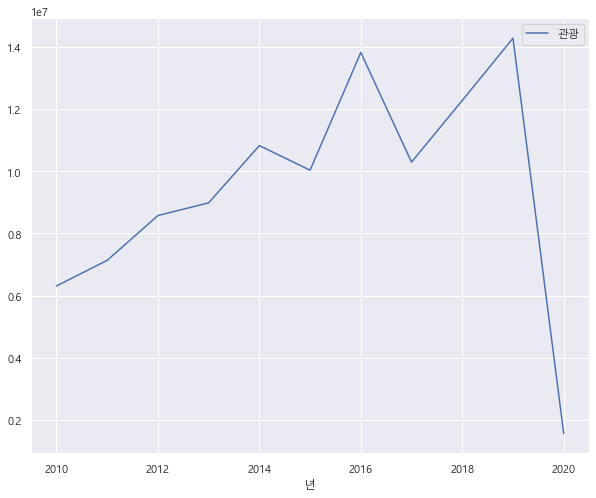

In [15]:
df_t = kto_data_df.groupby('년')[['관광']].sum()
df_t.plot()

<AxesSubplot:xlabel='년'>

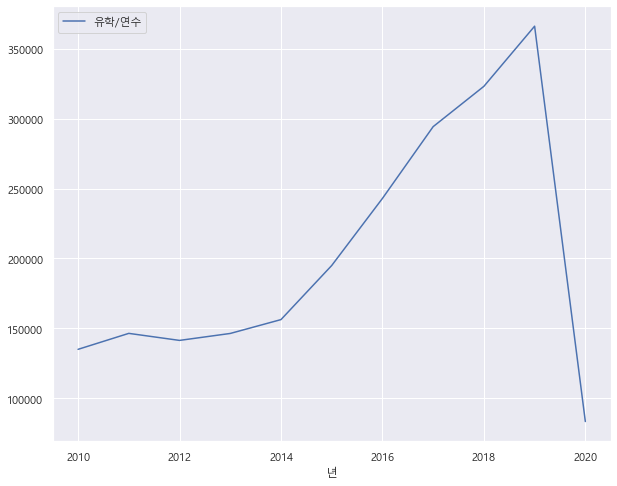

In [16]:
df_s = kto_data_df.groupby('년')[['유학/연수']].sum()
df_s.plot()

이명박 : 2008 ~ 2013<br>
박근혜 : 2013 ~ 2017<br>
문재인 : 2017 ~ 2022<br>

* 관광이 크게 감소한 해 : 2015, 2017<br>

<2015년에 있었던 일><br>
-메르스 사태<br>
-리퍼트 주한 미국대사 피습<br>
-중국 열병식 참관 (한미 동맹관계 악영향?)<br>
-IS 파리 테러<br>
-난민, 그리스 사태로 유럽 분열위기<br>
-정치, 입법이 실종된 최악의 국회라는 평가 받음<br>

<2017년에 있었던 일><br>
-‘미국 우선주의’ 트럼프에 긴장하는 국제사회<br>
-가뭄·홍수·폭염·혹한…기후변화 재난에 지구촌 몸살<br>
-유럽정치 중도기반 상실·좌우 양극화 따른 기성정치의 참패<br>
-트럼프-김정은, 북핵 둘러싼 ‘희대의 말폭탄’

* 관광이 크게 증가한 해 : 2016, 2019<br>

<2016년에 있었던 일><br>
-방한 시장의 절반 가까이 차지하는 중국인 관광객 덕분<br>
중국인 관광객의 방한 형태가 패키지 단체여행에서 개별 여행으로 빠르게 변하는 추세에 맞춰<br>
테마 상품(88선)을 개발하고 온라인·모바일 홍보를 강화한 것이 주효한 것으로 분석됨<br>
-단체관광객의 비자수수료 면제<br>
-'태양의 후예'와 같은 인기 드라마 등 한류를 통한 마케팅<br>
-일본인 관광객 : 경색됐던 한일관계가 개선되고 엔화가치도 상승했기 때문<br>

<2019년에 있었던 일 - 역대 최다 관광객><br>
-기생충 황금종려상 수상<br>
-중국 대학생 대상 비자 간소화 시행<br>
-동남아 및 중동시장을 대상으로 한 단체 전자비자 도입<br>
-한류스타를 통한 한국 관광 홍보 등 관광객 유치 정책

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
plt.rcParams['font.family'] = 'Malgun Gothic'

In [ ]:
df_travel_lee
df_travel_park
df_travel_moon

df_study_lee
df_study_park
df_study_moon

In [ ]:
df_lee
df_park
df_moon

In [38]:
df_lee

,관광,유학/연수
국적,,
일본,9575524,20544
중국,4357976,324306
미국,1484633,5827
대만,1346519,3846
태국,773362,2113
말레이시아,387574,3416
싱가포르,340695,1596
필리핀,259697,2230
독일,222273,3288


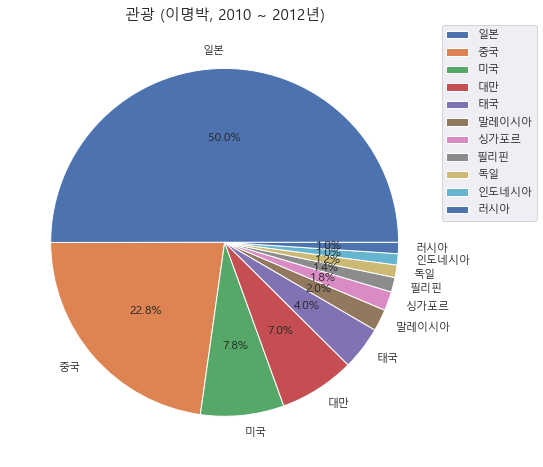

In [39]:
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_lee['관광'], labels = df_lee.index, autopct = '%.1f%%')
plt.title('관광 (이명박, 2010 ~ 2012년)', size = 15)
plt.legend(loc = (1, 0.55))
plt.show()

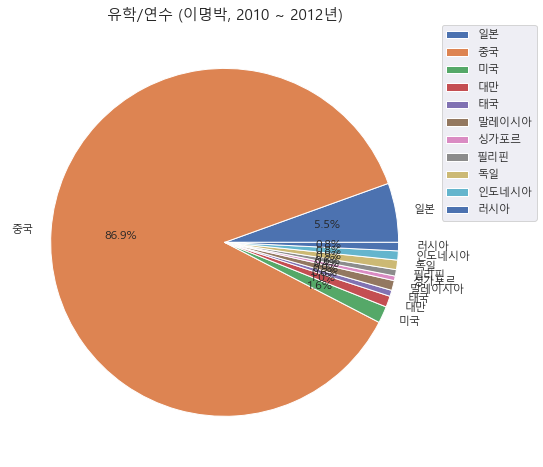

In [40]:
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_lee['유학/연수'], labels = df_lee.index, autopct = '%.1f%%')
plt.title('유학/연수 (이명박, 2010 ~ 2012년)', size = 15)
plt.legend(loc = (1, 0.55))
plt.show()

In [41]:
df_park

,관광,유학/연수
국적,,
중국,19573172,519476
일본,8762755,34235
대만,2474174,9635
미국,2336303,11695
홍콩,2085514,5648
말레이시아,883851,7171
러시아,514024,5297
인도네시아,442691,7819
베트남,391029,31815


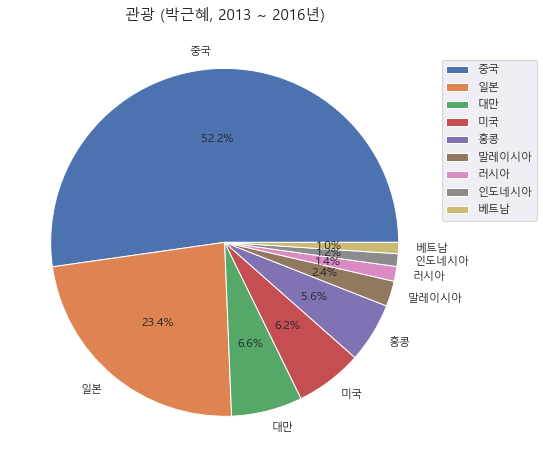

In [42]:
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_park['관광'], labels = df_park.index, autopct = '%.1f%%')
plt.title('관광 (박근혜, 2013 ~ 2016년)', size = 15)
plt.legend(loc = (1, 0.55))
plt.show()

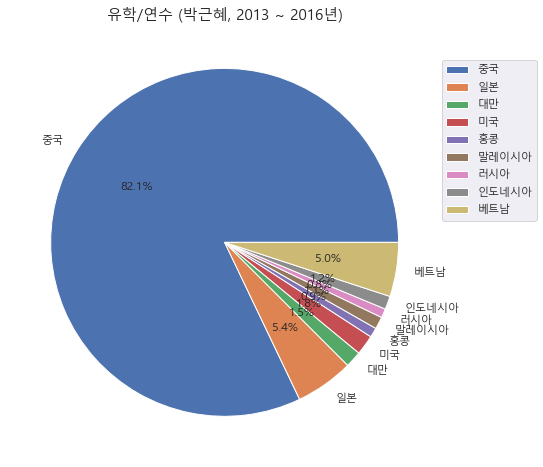

In [43]:
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_park['유학/연수'], labels = df_park.index, autopct = '%.1f%%')
plt.title('유학/연수 (박근혜, 2013 ~ 2016년)', size = 15)
plt.legend(loc = (1, 0.55))
plt.show()

In [44]:
df_moon

,관광,유학/연수
국적,,
중국,11711907,519476
일본,8266760,34235
대만,3241236,9635
미국,2212957,11695
홍콩,1993849,5648
말레이시아,1001330,7171
베트남,935437,31815
러시아,652513,5297
인도네시아,510765,7819


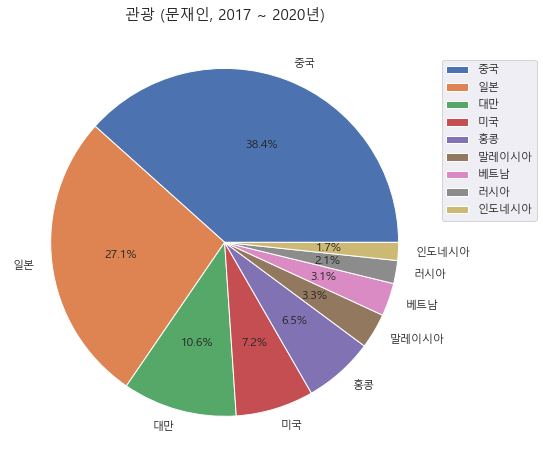

In [45]:
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_moon['관광'], labels = df_moon.index, autopct = '%.1f%%')
plt.title('관광 (문재인, 2017 ~ 2020년)', size = 15)
plt.legend(loc = (1, 0.55))
plt.show()

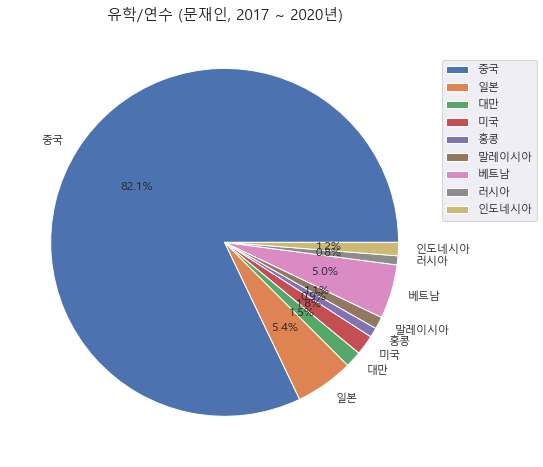

In [46]:
wedgeprops = {'width': 0.6, 'linewidth': 1, 'edgecolor': 'black'}
plt.pie(df_moon['유학/연수'], labels = df_moon.index, autopct = '%.1f%%')
plt.title('유학/연수 (문재인, 2017 ~ 2020년)', size = 15)
plt.legend(loc = (1, 0.55))
plt.show()

In [ ]:
df_travel_lee
df_travel_park
df_travel_moon

df_study_lee
df_study_park
df_study_moon

In [60]:
pd.merge(pd.merge(df_travel_lee, df_travel_park, on = '국적'), df_travel_moon, on = '국적')

,관광_x,관광_y,관광
국적,,,
일본,9575524,8762755,8266760
중국,4357976,19573172,11711907
미국,1484633,2336303,2212957
대만,1346519,2474174,3241236
홍콩,840103,2085514,1993849
태국,773362,1395350,1394023
말레이시아,387574,883851,1001330
싱가포르,340695,676340,631870
오스트레일리아,298150,448982,421475


In [69]:
df_trav = pd.merge(pd.merge(df_travel_lee, df_travel_park, on = '국적'), df_travel_moon, on = '국적')
df_trav.rename(columns = {'관광_x' : '2010~2012(이명박)', '관광_y' : '2013~2016(박근혜)', '관광' : '2017~2020(문재인)'}, inplace = True)
df_trav

,2010~2012(이명박),2013~2016(박근혜),2017~2020(문재인)
국적,,,
일본,9575524,8762755,8266760
중국,4357976,19573172,11711907
미국,1484633,2336303,2212957
대만,1346519,2474174,3241236
홍콩,840103,2085514,1993849
태국,773362,1395350,1394023
말레이시아,387574,883851,1001330
싱가포르,340695,676340,631870
오스트레일리아,298150,448982,421475


<AxesSubplot:title={'center':'관광 누적 그래프'}, xlabel='국적'>

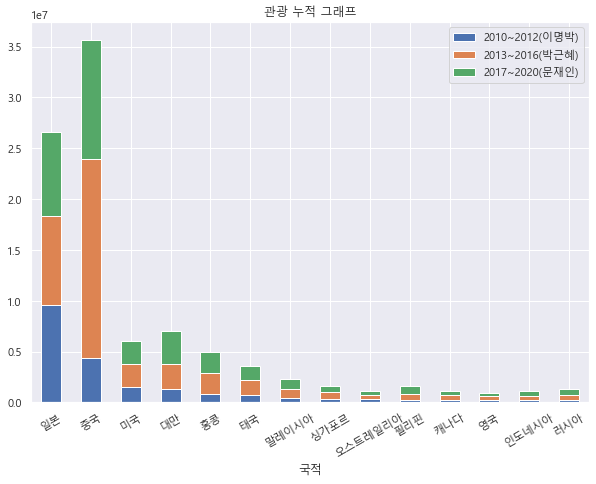

In [74]:
df_trav.plot.bar(stacked=True, figsize=(10,7), rot = 30, title = '관광 누적 그래프')

In [72]:
df_stu = pd.merge(pd.merge(df_study_lee, df_study_park, on = '국적'), df_study_moon, on = '국적')
df_stu.rename(columns = {'유학/연수_x' : '2010~2012(이명박)', '유학/연수_y' : '2013~2016(박근혜)', '유학/연수' : '2017~2020(문재인)'}, inplace = True)
df_stu

,2010~2012(이명박),2013~2016(박근혜),2017~2020(문재인)
국적,,,
중국,324306,519476,654797
일본,20544,34235,33536
몽골,12054,17478,23903
베트남,9556,31815,107326
미국,5827,11695,13267
프랑스,4855,12714,14025
대만,3846,9635,12778
말레이시아,3416,7171,7427
독일,3288,8565,8964


<AxesSubplot:title={'center':'유학/연수 누적 그래프'}, xlabel='국적'>

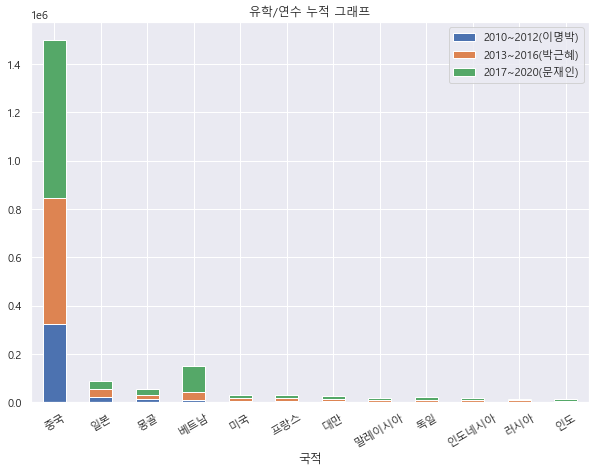

In [75]:
df_stu.plot.bar(stacked=True, figsize=(10,7), rot = 30, title = '유학/연수 누적 그래프')